<img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Martin Nicolas Menendez

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [2]:

def generador_senoidal (fs, f0, N, a0, p0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    ts = 1/fs # tiempo de muestreo
  
    tt = np.linspace(0, (N-1)*ts, N).flatten()   # grilla de sampleo 

    
    signal = a0 * np.sin(2*np.pi*f0 * tt + p0)
    
    # fin de la función
    
    return tt, signal


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import scipy.fftpack as sc

# Insertar aquí el código para inicializar tu notebook
########################################################
def generador_senoidal (fs, f0, N, a0, p0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función

    ts = 1/fs # tiempo de muestreo
    df = fs/N # resolución espectral
        
    tt = np.linspace(0, (N-1)*ts, N).flatten()   # grilla de sampleo 
    ff = np.linspace(0, (N-1)*df, N).flatten()
    
    signal = a0 * np.sin(2*np.pi*f0 * tt + p0)
    
    # fin de la función
    
    return ff, tt, signal

In [4]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


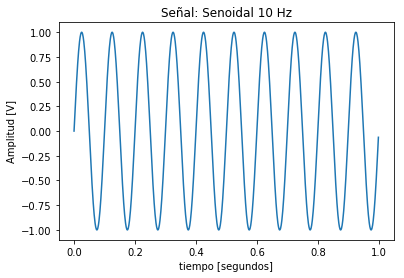

In [5]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
leyenda = str(f0) + ' Hz'

[ff,tt,signal] = generador_senoidal (fs, f0, N, a0, p0)


plt.figure(1)
line_hdls = plt.plot(tt, signal)
plt.title('Señal: ' + 'Senoidal ' + leyenda )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
#    plt.grid(which='both', axis='both')
    
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# este tipo de sintaxis es *MUY* de Python
#axes_hdl.legend(line_hdls, leyenda , loc='upper right'  )
  
plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La senoidal a.1 tiene una frecuencia de 10 Hz al tener 10 ciclos en 1 segundo.
</div>

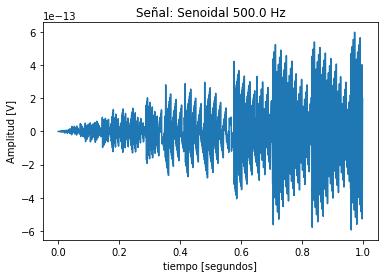

In [6]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
leyenda = str(f0) + ' Hz'

[ff,tt,signal] = generador_senoidal (fs, f0, N, a0, p0)


plt.figure(1)
line_hdls = plt.plot(tt, signal)
plt.title('Señal: ' + 'Senoidal ' + leyenda )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
#    plt.grid(which='both', axis='both')
    
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

    
# este tipo de sintaxis es *MUY* de Python
#axes_hdl.legend(line_hdls, leyenda , loc='upper right'  )
  
plt.show()

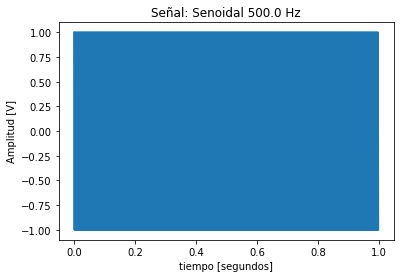

In [7]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
leyenda = str(f0) + ' Hz'

[ff,tt,signal] = generador_senoidal (fs, f0, N, a0, p0)


plt.figure(1)
line_hdls = plt.plot(tt, signal)
plt.title('Señal: ' + 'Senoidal ' + leyenda )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
#    plt.grid(which='both', axis='both')
    
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

    
# este tipo de sintaxis es *MUY* de Python
#axes_hdl.legend(line_hdls, leyenda , loc='upper right'  )
  
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no es posible conocer los parámetros de la senoidal solamente con el gráfico
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso a.2 estoy sub-muestreando sobre los ceros de la señal y la representación de esos "ceros" se va corriendo, debido a la aproximación numérica de Pi de forma incremental.
    
   En el caso de a.3 estoy sub-muestreando sobre los máximos de la señal y veo solamente +1 y -1, el python interpola entre ambos puntos y parecen lineas verticales cons
</div>

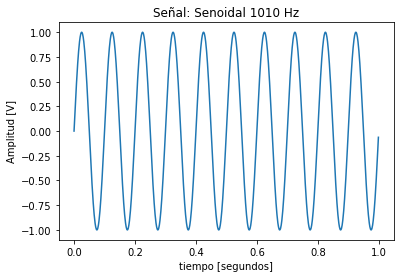

In [8]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
leyenda = str(f0) + ' Hz'

[ff,tt,signal] = generador_senoidal (fs, f0, N, a0, p0 )


plt.figure(1)

#plt.stem(tt,signal, 'r', )

line_hdls = plt.plot(tt, signal)
plt.title('Señal: ' + 'Senoidal ' + leyenda )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
#    plt.grid(which='both', axis='both')
    
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

    
# este tipo de sintaxis es *MUY* de Python
#axes_hdl.legend(line_hdls, leyenda , loc='upper right'  )
  
plt.show()


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No, no es posible.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Subir la frecuencia de muestreo o especificar con texto la frecuencia seteada en la leyenda o titulo.
</div>


<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

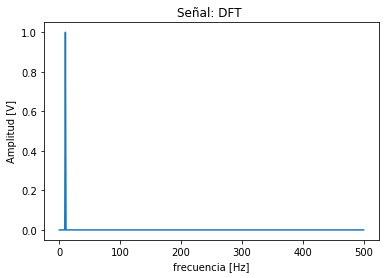

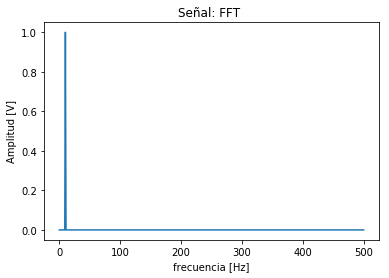

In [9]:
#%%
def dft(x):
    x = np.asarray(x, dtype=float)              # Convertir señal a vector
    N = x.shape[0]
    
    x_dft = np.zeros((N,1))
    
    n = np.arange(N)
    #k = n.reshape((N, 1))
    
    for i in n:
        sumreal = 0;
        sumimg = 0;
        for j in n:
            angle = 2 * np.pi * j * i / N
            sumreal += x[j]*np.cos(angle)
            sumimg += -x[j]*np.sin(angle)
            
        x_dft[i] = np.sqrt(sumreal**2+sumimg**2)
    
    #M = np.exp(-2j * np.pi * k * n / N)
    
    return x_dft

#%%%   


#%%%         

a0 = 1     # Volts
p0 = 0     # radianes
f0 = 10 # Hz
    
leyenda = str(f0) + ' Hz'

[ff,tt,senal] = generador_senoidal (fs, f0, N, a0, p0 )

frec = np.linspace(0.0,fs/2,N//2)


senal_dft = (2/N)*dft(senal)
half_senal_dft = senal_dft[:N//2]

plt.figure(4)
plt.plot(frec,half_senal_dft)
plt.title('Señal: ' + 'DFT ')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Amplitud [V]') 
plt.show()

senal_fft = (2/N)*np.abs(sc.fft(senal))
half_senal_fft = senal_fft[:N//2]

plt.figure(5)
plt.plot(frec,half_senal_fft)
plt.title('Señal: ' + 'FFT ')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Amplitud [V]') 
plt.show()

iguales = np.allclose(dft(senal), sc.fft(senal))

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

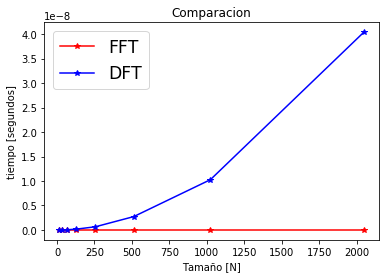

In [10]:
import scipy.fftpack as sc

def comparar_DFT_FFT(index):

    L = len(index)

    t_dft = np.zeros((L,1))
    t_fft = np.zeros((L,1))
    
    j = 0
    for i in index:
        #x = np.random.random(i)
       
        [ff,tt,senal] = generador_senoidal (1000, 100, i, 1, 0)
        
        dft_start = time.process_time_ns() 
        (2/N)*dft(senal)
        dft_end = time.process_time_ns() 
        t_dft[j] = dft_end-dft_start
        

        fft_start = time.process_time_ns()
        (2/N)*np.abs(sc.fft(senal))
        fft_end = time.process_time_ns() 
        t_fft[j] = fft_end-fft_start     
        j += 1

    return t_dft,t_fft

#%%
index = [16, 32, 64, 128, 256, 512, 1024, 2048]

[c_dft,c_fft] = comparar_DFT_FFT(index);

plt.figure(6)

c_dft=c_dft/1e9

plt.plot(index,c_fft,'-*r',label='FFT')
plt.plot(index,c_dft/1e9,'-*b',label='DFT')

plt.title('Comparacion')
plt.ylabel('tiempo [segundos]')
plt.xlabel('Tamaño [N]')

plt.legend(fontsize='xx-large', ncol=1)

plt.show()

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [11]:
import time

the_start = time.process_time_ns() 
print("hello")
the_end = time.process_time_ns() 
print(the_start - the_end)

#import time en ns


hello
0


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [12]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

resultados = [ ['DFT','FFT'], 
                   [str(c_dft[0][0]),str(c_fft[0][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[1][0]),str(c_fft[1][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[2][0]),str(c_fft[2][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[3][0]),str(c_fft[3][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[4][0]),str(c_fft[4][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[5][0]),str(c_fft[5][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[6][0]),str(c_fft[6][0])], # <-- acá debería haber numeritos :)
                   [str(c_dft[7][0]),str(c_fft[7][0])] # <-- acá debería haber numeritos :)
                 ]


df = DataFrame(resultados,columns=['tiempo transcurrido (s)',' '],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s),
Tamaño de la señal N,DFT,FFT
16,0.0,0.0
32,0.015625,0.0
64,0.03125,0.0
128,0.15625,0.0
256,0.640625,0.0
512,2.71875,0.0
1024,10.265625,0.0
2048,40.390625,0.0


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

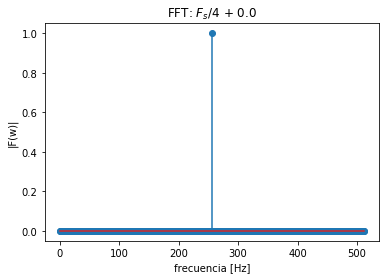

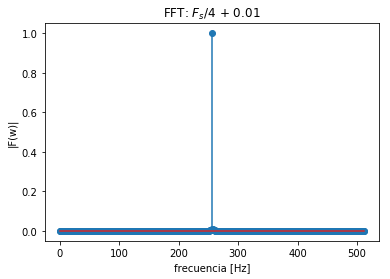

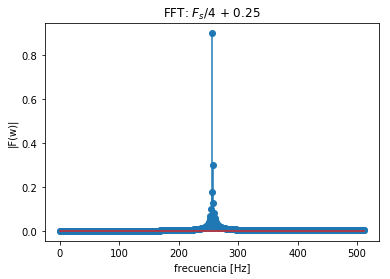

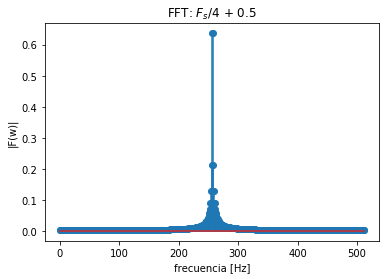

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

plt.close('all')

N = 1024                                                # Number of samplepoints
Fs = 1024                                                 # sample frequency

Fd = np.array([[0.00],[0.01],[0.25],[0.5]])

n_parametros = len(Fd)

F0 = Fs/4+Fd                                            # Frecuencia de Sen

t = np.linspace(0.0,(N-1)/Fs, N)                      # 0 a N paso (N-1)/Fs

y = np.sin(F0 * 2.0*np.pi*t)

spectrum_abs = (2/N)*np.abs(scipy.fftpack.fft(y))

frequency = np.linspace(0.0, Fs/2, N//2)

half_spectrum_abs=spectrum_abs[:,:N//2]

#fig, ax = plt.subplots()

for i in range(n_parametros):
    plt.figure(i+1)
    plt.stem(frequency, half_spectrum_abs[i])
    plt.title('FFT: $F_s/4$ + ' + str(Fd[i][0]) )
    plt.xlabel('frecuencia [Hz]')
    plt.ylabel('|F(w)|')
    plt.show()

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [14]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

suma = [0,0,0,0]

for k in range(n_parametros): 
    for j in range(N//2):
        if j != N//2//2:
            suma[k] += half_spectrum_abs[k][j]
        
    
resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [str(half_spectrum_abs[0][N//2//2]), str(half_spectrum_abs[0][N//2//2+1]), str(suma[0])],
                  [str(half_spectrum_abs[1][N//2//2]), str(half_spectrum_abs[1][N//2//2+1]), str(suma[1])],
                  [str(half_spectrum_abs[2][N//2//2]), str(half_spectrum_abs[2][N//2//2+1]), str(suma[2])], 
                  [str(half_spectrum_abs[3][N//2//2]), str(half_spectrum_abs[3][N//2//2+1]), str(suma[3])]  
                 ]

df = DataFrame(resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1.0,1.020600706953087e-14,6.580375260473893e-13
$f_S/4+0.01$,0.9998335911423953,0.010101334756021554,0.12724885797618354
$f_S/4+0.25$,0.8996258710732369,0.3007962417688694,2.814984451282746
$f_S/4+0.5$,0.6366177749955026,0.636623767140871,4.297337032770551


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

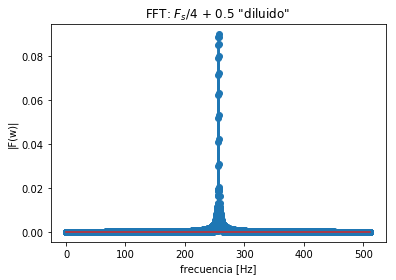

In [18]:
signal = np.pad(y[3,:],(N//10,N*10),'constant') 

M = N//10 + N + 10*N

spectrum_signal = (2/M)*np.abs(scipy.fftpack.fft(signal))

half_spectrum_signal=spectrum_signal[:M//2]

frequency_signal = np.linspace(0.0, Fs/2, M//2)

plt.figure(n_parametros+1)
plt.stem(frequency_signal, half_spectrum_signal)
plt.title('FFT: $F_s/4$ + 0.5 "diluido" ' )
plt.xlabel('frecuencia [Hz]')
plt.ylabel('|F(w)|')
plt.show()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, siendo la resolución espectral Fs/#Muestras, ahora se tiene M muestras con $M = N*(1+10+1/10) \sim 11*N >> N$ y eso hace que la resolución espectral sea mucho menor.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Pueden apreciarse una mayor cantidad de armonicos desplazados de la frecuencia F0 al tener una mayor resolución en frecuencia.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [32]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = ['', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '', # <-- acá debería haber numeritos :)
                  '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,
$N/10$,
$N$,
$10N$,
